In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./Datasets/User_Data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df.Gender = le.fit_transform(df.Gender)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

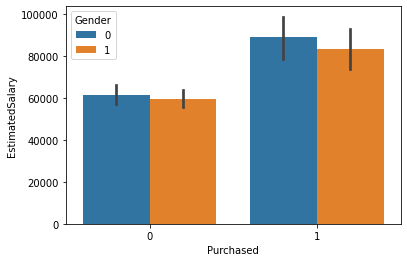

In [11]:
sns.barplot(y=df.EstimatedSalary, x=df.Purchased, hue=df.Gender, data = df)

In [14]:
df = df.drop('User ID', axis = 1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [17]:
df.shape

(400, 4)

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:-1], df.iloc[:, -1], test_size=0.2, random_state=1)

print(x_train.shape)
print(x_test.shape)

(320, 3)
(80, 3)


In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(x_train, y_train)
knn

KNeighborsClassifier(n_neighbors=10)

In [28]:
y_pred = knn.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cm = confusion_matrix(y_test, y_pred)

acc = accuracy_score(y_test, y_pred)

clr = classification_report(y_test, y_pred)

print(cm)
print()
print("accuracy ", acc*100)
print()
print("classification report")
print()
print(clr)

[[40  8]
 [12 20]]

accuracy  75.0

classification report

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        48
           1       0.71      0.62      0.67        32

    accuracy                           0.75        80
   macro avg       0.74      0.73      0.73        80
weighted avg       0.75      0.75      0.75        80



In [30]:
neighbours = [3, 5, 6, 8, 10, 15]
accuracy = []
conf_matrix = []

for i in neighbours:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred1 = knn.predict(x_test)
    accuracy.append(accuracy_score(y_test, y_pred)*100)
    conf_matrix.append(confusion_matrix(y_test, y_pred))

for i in range(len(accuracy)):
    print(conf_matrix[i], " \t\t", accuracy[i])

[[40  8]
 [12 20]]  		 75.0
[[40  8]
 [12 20]]  		 75.0
[[40  8]
 [12 20]]  		 75.0
[[40  8]
 [12 20]]  		 75.0
[[40  8]
 [12 20]]  		 75.0
[[40  8]
 [12 20]]  		 75.0
